In [1]:
import sys
sys.path.append('/workspace/Documents')
import CMR_HFpEF_Analysis.Defaults as Defaults
import CMR_HFpEF_Analysis.functions_collection as ff
import CMR_HFpEF_Analysis.Image_utils as util

import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import SimpleITK as sitk
import pydicom

main_path = '/mnt/mount_zc_NAS/HFpEF/data/HFpEF_data'

In [14]:
# load dicom
files = os.path.join(main_path, 'dicoms_manual_seg/ID_0085/SAX_ED_epi')
files = ff.find_all_target_files(['*'],files)
print(files.shape)
dcm = np.zeros([192,192,14])
for i in range(0,files.shape[0]):

    a = pydicom.dcmread(files[i])
    dcm[...,i] = a.pixel_array

# dcm = ff.nrrd_to_nii_orientation(dcm, format = 'dicom')


(14,)


In [15]:
# load nrrd
file = os.path.join(main_path, 'nnrd', 'need_ID_0085', 'Org3D_frame1.nrrd')

frame = sitk.ReadImage(file)
spacing = frame.GetSpacing()
nrrd = sitk.GetArrayFromImage(frame)
nrrd = np.rollaxis(nrrd,0,3)
# nrrd = ff.nrrd_to_nii_orientation(nrrd, format = 'nrrd')


In [16]:
# load nii
files = os.path.join(main_path, 'nii_manual_seg/ID_0085')
files = ff.find_all_target_files(['SAX_ED_epi.nii.gz'],files)

nii = nb.load(files[0])
nii_data = nii.get_fdata()
nii_data = ff.nii_to_nrrd_orientation(nii_data)  ## IMPORTANT: flip the axis to match the nrrd
print(nii_data.shape)


(192, 192, 14)


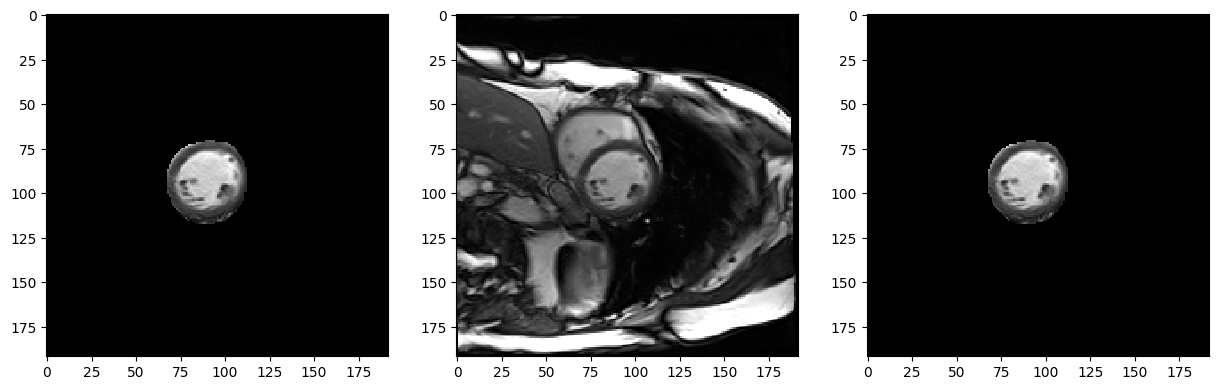

In [17]:
plt.figure(figsize = (15,5))
plt.subplot(131); plt.imshow(ff.set_window(dcm[...,8],250,500) ,'gray')
plt.subplot(132); plt.imshow(ff.set_window(nrrd[...,8],250,500) , 'gray')
plt.subplot(133); plt.imshow(ff.set_window(nii_data[...,8],250,500) , 'gray')